In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from xgboost import XGBClassifier, XGBRFClassifier, callback
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv(r"C:\Users\jinay\OneDrive\Documents\VS Codes\Seismic Seekers\data_df")
df

,Timestamp,Equipment,Category,Brand,Model,Location Type,Water Zone,Formation Type,Drilling Depth (m),Formation Pressure (bar),...,Vibration (mm/s),Operating Hours,Replaced Parts,Failure Cause,Part,Daily Rate (USD),Lead Time (days),In Stock,Failure Class,Observed Symptom
0,2024-05-08 08:06:17.814980420,Mud Motor,Motor,FlowTech,MM-50,Onshore,Onshore,Sandstone,1135.961362,427.261027,...,2.612195,21,"Bearing, Compressor, Heat Exchanger",Mechanical issue,Flow Control Valve,800,7,True,0,Pressure loss
1,2025-03-01 04:53:47.781161781,Semi-submersible Rig,Rig,SubSeaWorks,SSR-300,Onshore,Onshore,Limestone,4957.834839,131.721585,...,2.170569,22,Heat Exchanger,Natural wear,Oil Filter,75000,10,True,0,Oil flow anomaly
2,2024-10-12 13:10:32.519667170,Land-based Rotary Rig,Rig,RigCo,LR-100,Onshore,Onshore,Shale,769.254194,485.448051,...,2.018211,16,Filter,Electrical failure,Flow Control Valve,50000,14,True,0,Fluid leakage
3,2024-07-04 08:03:06.777571181,Tricone Drill Bit,Drill Bit,RockDrill,TRC-150,Offshore,Negligible,Granite,2673.449908,62.721562,...,1.320961,17,"Heat Exchanger, Valve, Compressor",NaN,Heat Exchanger,1000,3,True,1,Lack of pressure
4,2024-06-10 09:26:09.972010656,Mud Pump,Pump,PumpMaster,MP-300,Offshore,Mid-shallow,Basalt,1273.584161,71.246565,...,1.145536,20,Compressor,Leakage,Heat Exchanger,2000,10,True,1,Pressure loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878639,2024-08-12 23:13:07.481714981,Mud Motor,Motor,FlowTech,MM-50,Offshore,Mid-shallow,Limestone,959.312486,489.736105,...,2.198884,17,"Bearing, Heat Exchanger",Mechanical issue,Pressure Valve,800,7,True,0,Lack of pressure
878640,2025-04-20 21:06:53.500063338,Land-based Rotary Rig,Rig,RigCo,LR-100,Offshore,Deep,Limestone,1691.841286,332.776652,...,2.797736,23,"Filter, Heat Exchanger, Valve",Natural wear,Heat Exchanger,50000,14,True,0,Lack of pressure
878641,2024-09-04 23:12:52.413330379,Mud Motor,Motor,FlowTech,MM-50,Onshore,Onshore,Granite,2947.053639,372.133877,...,2.247256,18,Compressor,Electrical failure,Bearing,800,7,True,0,Lack of pressure
878642,2025-03-14 08:18:30.798608049,Land-based Rotary Rig,Rig,RigCo,LR-100,Offshore,Shallow,Dolomite,3156.874161,272.261662,...,1.349463,18,Filter,Natural wear,Heat Exchanger,50000,14,True,1,Stopped working


In [3]:
df.nunique()

Timestamp                   878644
Equipment                        9
Category                         5
Brand                            9
Model                            9
Location Type                    2
Water Zone                       7
Formation Type                   7
Drilling Depth (m)          878644
Formation Pressure (bar)    878644
Mud Weight (ppg)            878644
Mud Viscosity (cP)          878644
Pump Pressure (bar)         878644
Pump Flow (L/min)           878644
ROP (m/hr)                  878644
Hook Load (t)               878644
Torque (kN·m)               878644
Maintenance Type                 2
Temperature (°C)            878644
Pressure (bar)              878644
Vibration (mm/s)            878644
Operating Hours                  9
Replaced Parts                  85
Failure Cause                    4
Part                             5
Daily Rate (USD)                 9
Lead Time (days)                 7
In Stock                         2
Failure Class       

In [4]:
import pandas as pd

# 1) first normalize to remove spaces around the commas:
clean = df['Replaced Parts'].str.replace(r',\s*', ',', regex=True)

# 2) then get_dummies on the literal comma
dummies = clean.str.get_dummies(sep=',')

# 3) optional: strip any whitespace from the column names
dummies.columns = dummies.columns.str.strip()

# 4) join back to your original DataFrame
df_with_flags = pd.concat([df, dummies], axis=1)

print(df_with_flags.head())

                       Timestamp              Equipment   Category  \
0  2024-05-08 08:06:17.814980420              Mud Motor      Motor   
1  2025-03-01 04:53:47.781161781   Semi-submersible Rig        Rig   
2  2024-10-12 13:10:32.519667170  Land-based Rotary Rig        Rig   
3  2024-07-04 08:03:06.777571181      Tricone Drill Bit  Drill Bit   
4  2024-06-10 09:26:09.972010656               Mud Pump       Pump   

         Brand    Model Location Type   Water Zone Formation Type  \
0     FlowTech    MM-50       Onshore      Onshore      Sandstone   
1  SubSeaWorks  SSR-300       Onshore      Onshore      Limestone   
2        RigCo   LR-100       Onshore      Onshore          Shale   
3    RockDrill  TRC-150      Offshore   Negligible        Granite   
4   PumpMaster   MP-300      Offshore  Mid-shallow         Basalt   

   Drilling Depth (m)  Formation Pressure (bar)  ...  Daily Rate (USD)  \
0         1135.961362                427.261027  ...               800   
1         4957.8

In [5]:
df_with_flags.dropna(inplace=True)
df_with_flags.isnull().sum()

Timestamp                   0
Equipment                   0
Category                    0
Brand                       0
Model                       0
Location Type               0
Water Zone                  0
Formation Type              0
Drilling Depth (m)          0
Formation Pressure (bar)    0
Mud Weight (ppg)            0
Mud Viscosity (cP)          0
Pump Pressure (bar)         0
Pump Flow (L/min)           0
ROP (m/hr)                  0
Hook Load (t)               0
Torque (kN·m)               0
Maintenance Type            0
Temperature (°C)            0
Pressure (bar)              0
Vibration (mm/s)            0
Operating Hours             0
Replaced Parts              0
Failure Cause               0
Part                        0
Daily Rate (USD)            0
Lead Time (days)            0
In Stock                    0
Failure Class               0
Observed Symptom            0
Bearing                     0
Compressor                  0
Filter                      0
Heat Excha

In [6]:
print(df_with_flags.dtypes)

Timestamp                    object
Equipment                    object
Category                     object
Brand                        object
Model                        object
Location Type                object
Water Zone                   object
Formation Type               object
Drilling Depth (m)          float64
Formation Pressure (bar)    float64
Mud Weight (ppg)            float64
Mud Viscosity (cP)          float64
Pump Pressure (bar)         float64
Pump Flow (L/min)           float64
ROP (m/hr)                  float64
Hook Load (t)               float64
Torque (kN·m)               float64
Maintenance Type             object
Temperature (°C)            float64
Pressure (bar)              float64
Vibration (mm/s)            float64
Operating Hours               int64
Replaced Parts               object
Failure Cause                object
Part                         object
Daily Rate (USD)              int64
Lead Time (days)              int64
In Stock                    

In [7]:
cols = df_with_flags.select_dtypes(include='object').columns
cols

Index(['Timestamp', 'Equipment', 'Category', 'Brand', 'Model', 'Location Type',
       'Water Zone', 'Formation Type', 'Maintenance Type', 'Replaced Parts',
       'Failure Cause', 'Part', 'Observed Symptom'],
      dtype='object')

In [8]:
le = LabelEncoder()

for i in cols:
    df_with_flags[i] = le.fit_transform(df_with_flags[i])
    
print(df_with_flags.dtypes)

Timestamp                     int32
Equipment                     int32
Category                      int32
Brand                         int32
Model                         int32
Location Type                 int32
Water Zone                    int32
Formation Type                int32
Drilling Depth (m)          float64
Formation Pressure (bar)    float64
Mud Weight (ppg)            float64
Mud Viscosity (cP)          float64
Pump Pressure (bar)         float64
Pump Flow (L/min)           float64
ROP (m/hr)                  float64
Hook Load (t)               float64
Torque (kN·m)               float64
Maintenance Type              int32
Temperature (°C)            float64
Pressure (bar)              float64
Vibration (mm/s)            float64
Operating Hours               int64
Replaced Parts                int32
Failure Cause                 int32
Part                          int32
Daily Rate (USD)              int64
Lead Time (days)              int64
In Stock                    

In [9]:
df_with_flags.drop('Timestamp', axis=1, inplace=True)

corr = df_with_flags.corr()
corr['Failure Class']

Equipment                   0.050765
Category                   -0.011082
Brand                       0.006886
Model                       0.041649
Location Type               0.000234
Water Zone                 -0.000229
Formation Type             -0.009581
Drilling Depth (m)          0.114734
Formation Pressure (bar)    0.064777
Mud Weight (ppg)            0.012751
Mud Viscosity (cP)          0.034817
Pump Pressure (bar)         0.045738
Pump Flow (L/min)           0.000116
ROP (m/hr)                  0.037341
Hook Load (t)               0.046257
Torque (kN·m)               0.071011
Maintenance Type           -0.074560
Temperature (°C)            0.060859
Pressure (bar)             -0.029598
Vibration (mm/s)            0.049301
Operating Hours             0.043654
Replaced Parts              0.009412
Failure Cause              -0.069166
Part                       -0.000669
Daily Rate (USD)           -0.069949
Lead Time (days)           -0.035233
In Stock                   -0.007492
F

In [10]:
df_with_flags.skew()

Equipment                   0.022939
Category                   -0.487998
Brand                       0.007622
Model                       0.022608
Location Type              -0.002252
Water Zone                 -0.564202
Formation Type              0.002217
Drilling Depth (m)          0.047354
Formation Pressure (bar)    0.029295
Mud Weight (ppg)            0.001908
Mud Viscosity (cP)          0.009515
Pump Pressure (bar)         0.016826
Pump Flow (L/min)           0.000773
ROP (m/hr)                  0.009735
Hook Load (t)               0.011630
Torque (kN·m)               0.020331
Maintenance Type           -0.044691
Temperature (°C)            0.025327
Pressure (bar)             -0.009299
Vibration (mm/s)            0.014158
Operating Hours             0.016319
Replaced Parts              0.003142
Failure Cause              -0.034344
Part                       -0.002025
Daily Rate (USD)            0.480383
Lead Time (days)            0.883270
In Stock                   -2.475941
F

In [11]:
# X = df_with_flags.drop('Failure Class', axis=1)
# y = df_with_flags['Failure Class']

# rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1, max_depth=10)
# rf.fit(X, y)

# importances = rf.feature_importances_
# feat_imp_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': importances
# }).sort_values('Importance', ascending=False)
# feat_imp_df

In [12]:
Features = df_with_flags.drop(columns={'Failure Class'}, axis=1)
Labels = df_with_flags['Failure Class']

ss = StandardScaler()
Features = ss.fit_transform(Features)

features_train, features_test, labels_train, labels_test = train_test_split(Features, Labels, test_size=0.2, random_state=42)

# Model_dict = {
#     'XGB': XGBClassifier(
#         n_estimators=200,
#         max_depth=6,
#         learning_rate=0.1,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         random_state=42,
#         use_label_encoder=False,
#         eval_metric='logloss'
#     ),
#     # 'XGBRF': XGBRFClassifier(
#     #     n_estimators=200,
#     #     max_depth=6,
#     #     subsample=0.8,
#     #     colsample_bynode=0.8,
#     #     random_state=42
#     # ),
#     # 'DecisionTree': DecisionTreeClassifier(
#     #     max_depth=None,
#     #     min_samples_split=5,
#     #     random_state=42
#     # ),
#     'RandomForest': RandomForestClassifier(
#         n_estimators=200,
#         max_depth=None,
#         min_samples_split=5,
#         random_state=42,
#         n_jobs=-1
#     ),
#     'AdaBoost': AdaBoostClassifier(
#         n_estimators=100,
#         learning_rate=0.5,
#         random_state=42
#     ),
#     'Bagging': BaggingClassifier(
#         n_estimators=50,
#         max_samples=0.8,
#         max_features=0.8,
#         random_state=42,
#         n_jobs=-1
#     ),
#     'ExtraTrees': ExtraTreesClassifier(
#         n_estimators=200,
#         max_depth=None,
#         random_state=42,
#         n_jobs=-1
#     ),
#     # 'GB': GradientBoostingClassifier(
#     #     n_estimators=200,
#     #     learning_rate=0.1,
#     #     max_depth=3,
#     #     random_state=42
#     # ),
#     'HistGB': HistGradientBoostingClassifier(
#         max_iter=200,
#         learning_rate=0.1,
#         max_depth=None,
#         random_state=42
#     )
#     # 'LogisticRegression': LogisticRegression(
#     #     C=1.0,
#     #     penalty='l2',
#     #     solver='lbfgs',
#     #     max_iter=1000,
#     #     random_state=42
#     # ),
#     # 'KNN': KNeighborsClassifier(
#     #     n_neighbors=7,
#     #     weights='distance',
#     #     p=2,
#     #     n_jobs=-1
#     # )
# }
# Training_Accuracy_dict = {}
# Precision_dict = {}
# Recall_dict = {}
# F1_score_dict = {}

# for key, val in Model_dict.items():
#     val.fit(features_train, labels_train)
    
#     train_pred = val.predict(features_test)
#     Training_Accuracy = accuracy_score(train_pred, labels_test)
#     Training_Accuracy_dict.update({key:Training_Accuracy})
#     Precision_dict.update({key:precision_score(train_pred,labels_test)})
#     Recall_dict.update({key:recall_score(train_pred,labels_test)})
#     F1_score_dict.update({key:f1_score(train_pred,labels_test)})
    
#     fig, ax = plt.subplots()
#     ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(train_pred,labels_test), display_labels=['Not A Failure', 'Failure']).plot(ax=ax)
#     ax.set_title(key)
#     plt.show()

In [13]:
# accuracy_df = pd.DataFrame()
# accuracy_df['Model Name'] = Model_dict.keys()
# accuracy_df['Training Accuracy'] = Training_Accuracy_dict.values()
# accuracy_df['Precision'] = Precision_dict.values()
# accuracy_df['Recall'] = Recall_dict.values()
# accuracy_df['F1 Score'] = F1_score_dict.values()
# accuracy_df

In [14]:
# param_dist = {
# #     'n_estimators': [100, 200, 300, 500],
# #     'max_depth': [3, 5, 7, 9],
# #     'learning_rate': [0.01, 0.05, 0.1, 0.2],
# #     'subsample': [0.6, 0.8, 1.0],
# #     'colsample_bytree': [0.6, 0.8, 1.0],
# #     'gamma': [0, 0.1, 0.5, 1],
# #     'reg_alpha': [0, 0.1, 1],
# #     'reg_lambda': [1, 5, 10]
# # }

# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# # rs = RandomizedSearchCV(
# #     xgb, param_dist, n_iter=30,
# #     scoring='f1', cv=cv, verbose=2, n_jobs=-1, random_state=42
# # )
# rs.fit(features_train, labels_train)

# print("Best parameters:", rs.best_params_)
# best_xgb = rs.best_estimator_

c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:01:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training CV F1: 0.649 ± 0.003

Test set classification report:
              precision    recall  f1-score   support

           0      0.640     0.722     0.679     69044
           1      0.691     0.605     0.645     70923

    accuracy                          0.663    139967
   macro avg      0.666     0.664     0.662    139967
weighted avg      0.666     0.663     0.662    139967



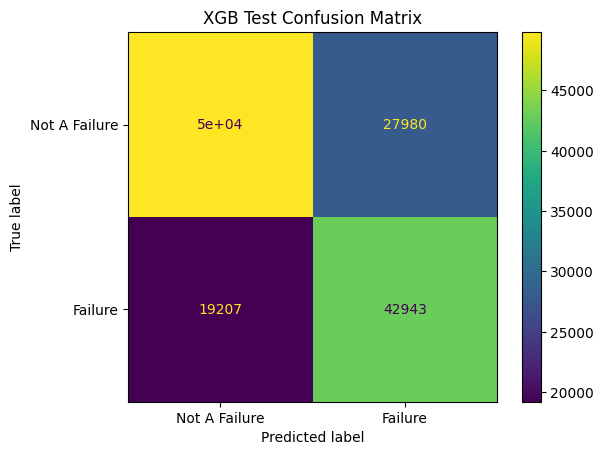

In [15]:
best_xgb = XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )

best_xgb.fit(features_train, labels_train)
train_pred = best_xgb.predict(features_test)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_xgb, features_train, labels_train, cv=cv, scoring='f1', n_jobs=-1)
print(f"Training CV F1: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Evaluate on test set
y_pred = best_xgb.predict(features_test)
print("\nTest set classification report:")
print(classification_report(labels_test, y_pred, digits=3))

# Confusion matrix
fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(train_pred,labels_test), display_labels=['Not A Failure', 'Failure']).plot(ax=ax)
ax.set_title("XGB Test Confusion Matrix")
plt.show()

In [16]:
best_xgb.save_model('best_xgb.json')